# KWAK Demo  

In this tutorial, we demonstrate how to use the KWAK package. 
The example below is for the Kaluza-Klein model found in the examples folder. Other data sets with simple signals (bumps and dips) are also available in the example folder.  

Example data files:  
**Wide.csv** : Wide bump added to the hypothesis.   
**Narrow.csv** : Narrow bump added to the hypothesis.   
**BumpDip.csv** : Bump followed by a dip added to the hypothesis.  
**Oscillations.csv** : Series of small oscillations added to the hypothesis.  

In [1]:
# -- Dependencies --
import sys
import numpy as np 
import pandas as pd 
import kwak 

In [2]:
# -- Load the data file -- 
Examples_dir = "./examples/"
File_name = "KK.csv" 
File_dframe = pd.read_csv(Examples_dir+File_name)

# -- Data Frame of the example files -- 
print ("File    : ", File_name)
print ("Columns : ", [col for col in File_dframe.columns])
print ("No. of bins :", len(File_dframe))

File    :  KK.csv
Columns :  ['M(gamma gamma) [GeV]', 'Nevents', 'Sigma', 'Hypothesis', 'Generating Function']
No. of bins : 128


The example files have the column format  
**M(gamma gamma) [GeV]** : Binned diphoton invariant mass [GeV].  
**Nevents** : Number of events per bin.  
**Sigma** : Standard deviation per bin.  
**Hypothesis** : Hypothesis assumed for the given example.  
**Generating Function** : Function used to create the artificial signal on top of the hypothesis.  

To use the Nsets method, only "Nevents" and "Hypothesis" are needed. 

In [3]:
# -- Optional -- 
# Output the result of the kwak analysis to a new directory 
#Output_dir = "Demo_KK"
Output_dir = None

### Data Preprocessing  

In [4]:
Nevents = np.asarray(File_dframe['Nevents'].values, dtype=int) # The number of events must be integer-type
Hypothesis = np.asarray(File_dframe['Hypothesis'].values, dtype=float)
assert(len(Nevents)==len(Hypothesis)), "Nevents and Hypothesis arrays must have the same length."

# Optional:
# Separate the "Signal" region (first 64 bins) from the "overflow" region (last 64 bins).
Nbins = 64 
data_signal = Nevents[:Nbins]
data_overflow = np.sum(Nevents[Nbins:])
hypo_signal = Hypothesis[:Nbins]
hypo_overflow = np.sum(Hypothesis[Nbins:])

# Optional (for plotting):
# Get the "Generating Function" for the Nsigma Scalograms.
GenFunc = np.asarray(File_dframe['Generating Function'].values, dtype=float)
genfunc_signal = GenFunc[:Nbins]
genfunc_overflow = np.sum(GenFunc[Nbins:])

### Nsets Method  

This method samples the hypothesis from a Poisson distribution 'nsets' number of times.  
The discrete Haar wavelet coefficients of the sampled nset hypotheses are then calculated and used to estimate the probability of obtaining the coefficients equal to those of the data. 

If extrapolate is true, a new hypothesis is extrapolated from the nset hypotheses.
When the extrapolate option is true, nsets must be at least 300,000. 

In [5]:
# -- Call the nsets method --
# extr_sets is an instance of the nsets method. If outputdir is not none, a directory will be created 
# with the data from the attributes of this class in csv files.
extr_nsets = kwak.nsets(data_signal, hypo_signal, nsets=3*10**5,
                        seed=123,
                        extrapolate=True,
                        fastGaussian=False,
                        outputdir=Output_dir)


In [6]:
# Save the attributes of extr_nsets
Level = extr_nsets.Level
Histogram = extr_nsets.Histogram
Nsigma = extr_nsets.Nsigma 
NsigmaFixedRes = extr_nsets.NsigmaFixedRes

# If fastGaussian is False
PlessX = extr_nsets.PlessX 
PeqX = extr_nsets.PeqX

# If fastGaussian is False AND extrapolate is true
Nsigma_fit = extr_nsets.Nsigma_fit
PlessX_fit = extr_nsets.PlessX_fit
PeqX_fit = extr_nsets.PeqX_fit
NsigmaFixedRes_fit = extr_nsets.NsigmaFixedRes_fit

## Plotting

### Wavelet Scalograms  
Wavelet scalograms display the discrete wavelet coefficients of a data array as bar plots. 
The different wavelet scalograms and their options are shown below.

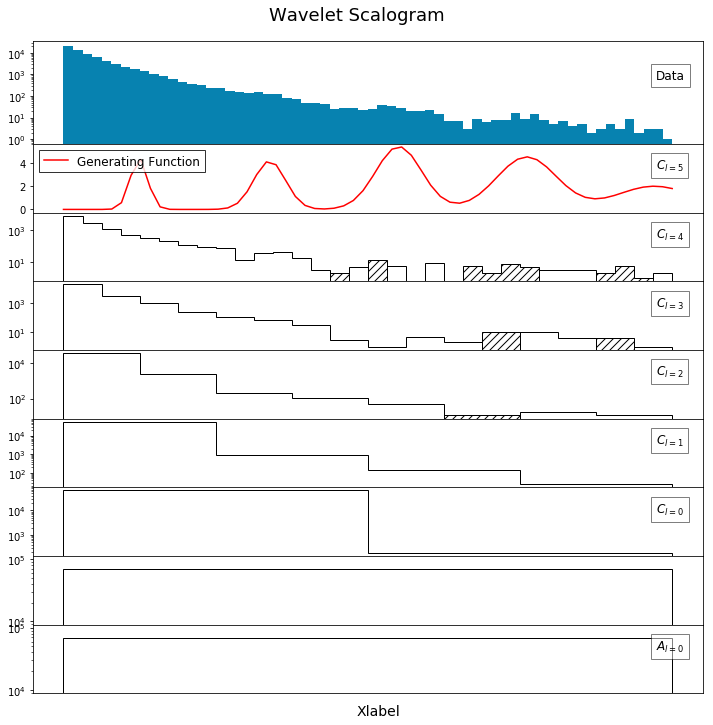

In [7]:
kwak.wScalogram(data=data_signal, 
                hypothesis=hypo_signal,
                signal_only=genfunc_signal,  
                firsttrend=True,
                logscale=True, filled=False, 
                title="Wavelet Scalogram",
                xlabel="Xlabel",
                outputfile=None)

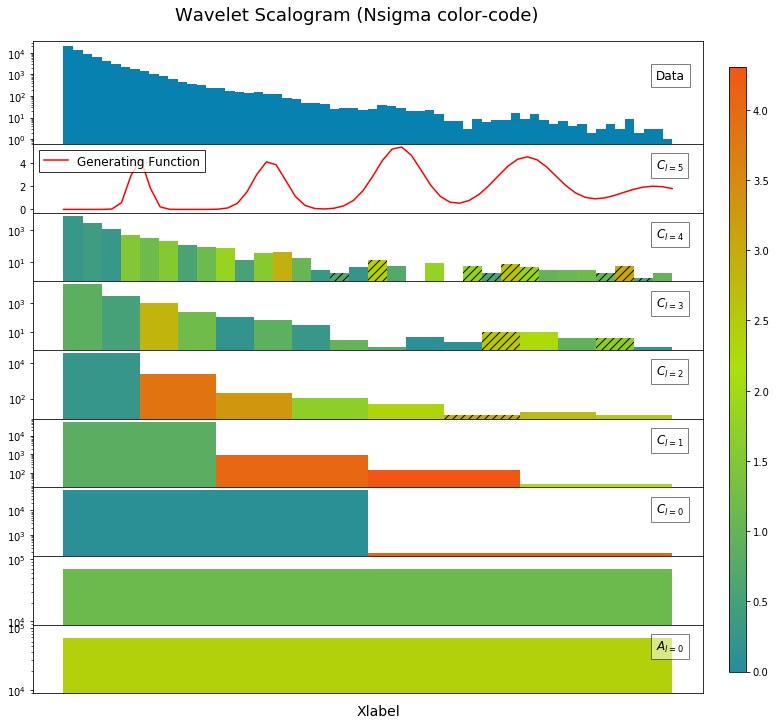

In [11]:
kwak.wScalogram_nsig(data=data_signal, 
                     hypothesis=hypo_signal,
                     signal_only=genfunc_signal,  
                     nsigma=Nsigma, 
                     firsttrend=True, logscale=True, 
                     title="Wavelet Scalogram (Nsigma color-code)",
                     xlabel="Xlabel",
                     outputfile=None)

### Nsigma Scalograms  
Nsigma scalograms display the nsigma values of the corresponding discrete wavelet coefficients of a data array as bar plots. 
The different wavelet scalograms and their options are shown below.

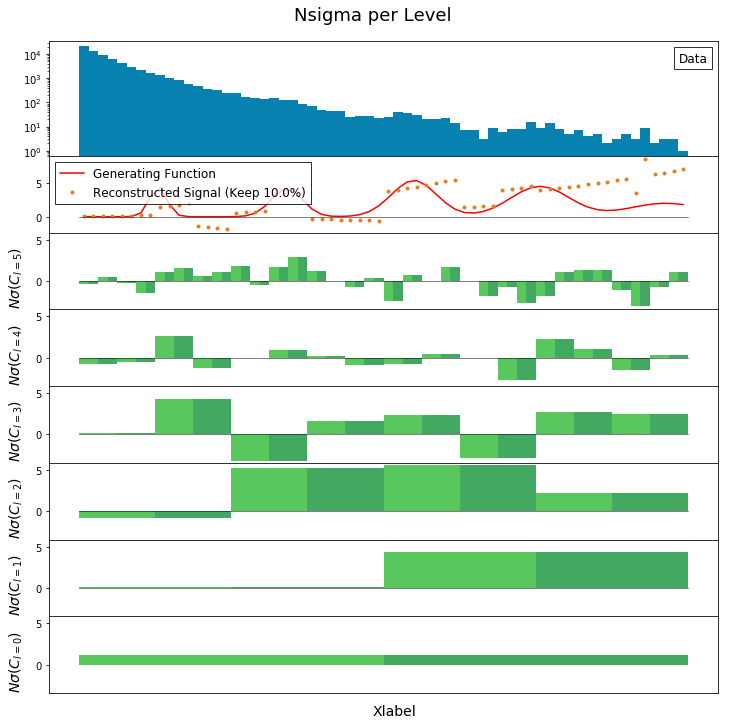

In [12]:
r_percent = 10
kwak.nsigScalogram(data_signal, hypo_signal, Nsigma_fit, genfunc_signal,
                   nsigma_percent=r_percent*0.01,
                   nsigma_colorcode=False, 
                   title="Nsigma per Level (with RecSignal)",
                   xlabel="Xlabel",
                   outputfile=None)

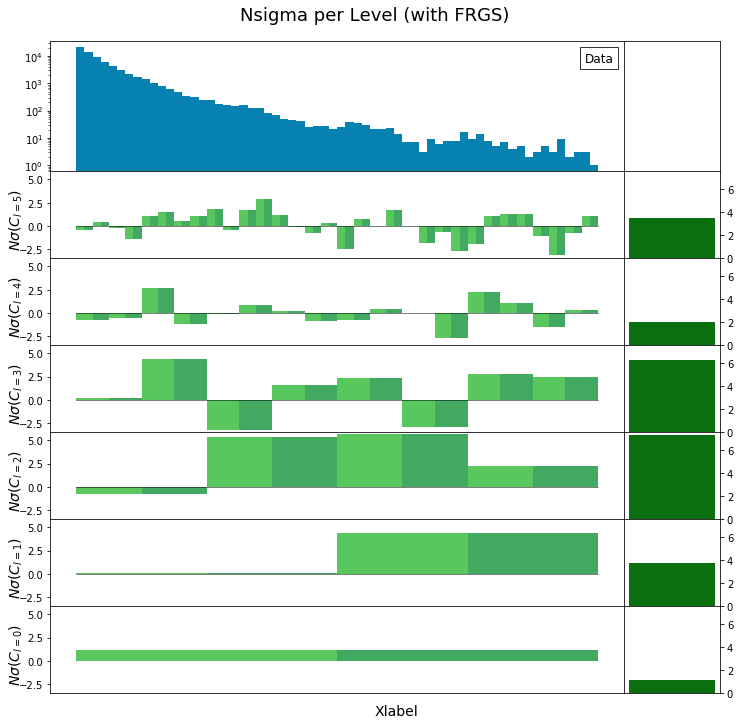

In [13]:
kwak.nsigFixedRes(data_signal, hypo_signal, Nsigma_fit, NsigmaFixedRes_fit,
                  nsigma_colorcode=False, 
                  title="Nsigma per Level (with FRGS)",
                  xlabel="Xlabel",
                  outputfile=None)